<a href="https://colab.research.google.com/github/SirTee12/investigate-_a-_dataset_on_the_medical_appointment_no_show_dataset/blob/main/Copy_of_Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project: Investigate The Medical Appointment No show Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The daraset contains 13 columns and each row contains information about the patient.

>+ **PatientID** and **AppointmentID** uniquely identifies the patient.
+ **Gender** signifies the sex of the patient whether male or female.
+**ScheduledDay** and **AppointmentDay** signifiies the date and time the patients set up their appointment and the and when they were supposed to come for the appointment respectively.
+ **Neighbourhood** indicates the location of the hospital.
+ **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
+ **Hipertension, Scholarship, Diabetes, Alcoholism, Handcap and SMS_recieved** indicate the medical condition of the patients with values 1(which indicate the person has the condition) and 0(which indicate the patient doesn't have the condition
+ **No-show** is categorical where **yes** indicate the patient didn't show up for the appointment and **no** indicates that the patient showed up 



### Question(s) for Analysis
> + What is the proportion of those that showed up for appointment vs those that didn't?
> + Is the medical condition associated with the patient not showing up(**Hipertension** is the object of focus)
> + Do the older generation tend to miss appointment?
> + What does **Gender** have to do with not showing up?

In [ ]:
#import the neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### Load the dataset and read the first few rows



In [ ]:
# Load and read data
df_no_show = pd.read_csv('/KaggleV2-May-2016.csv')
df_no_show.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Rename CSV file 
>The csv file should be renamed because the original name doesn't give us much information about the data set. The name of a dataset should give us a sense of what to expect. The renamed file should be verified to ensure data conistency and accuracy.

In [ ]:
#rename csv files
df_no_show = df_no_show.to_csv('no_appointment.csv', index=False)
#reload data
df_no_show = pd.read_csv('no_appointment.csv')
#reverify data loaded
df_no_show.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No



> The file has been renamed and has been verified. we need to investigatae if there are inconsistencies in the dataset such as 
+ Null values 
+ inconsistent data types
+ removing any column or row which are of no use to the analysis

> We will drop columns such as **Unnamed** and the **PatientID** as they pose no importance to our analysis and we already have  two IDs but we only need one for reference

> We need to get the shape and general overview of our dataset

### Locating Null Values and getting data type of each column

In [ ]:
#get the shape of the data
df_no_show.shape
#get more info about the columns and rows
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Using proper data types
> A coomon type of data seems numeric but they often represent categories (i.e they are categorical) with a finite number of other categories. The **Scholarship** down to **No-show** falls under this. Their data type should be **category** not **int** 

In [ ]:
#convert all columns with binary values to bool
df_no_show[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'No-show']] = df_no_show[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'No-show']].astype('category')
df_no_show['Hipertension'].dtype

#verify
df_no_show.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [ ]:
#drop last two columns
df_no_show.drop(columns = df_no_show.iloc[:, 14:16], axis=1, inplace = True)
#verify
df_no_show.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



>There appears to be no **Null Values**. There are two IDs present so we drop one of the. We will be dropping the **PatientId** column. Our focus is on the appointment so we will be referencing the **AppointmentID**.

In [ ]:
#drop columns
#df_no_appoint.drop(['PatientId'], axis=1, inplace=True)
#print a few rows
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Find the duplicate values
> The focus is on **AppointmentID** as we wil be referencing it alot in our analysis

In [ ]:
#function to find duplicate
def find_duplicates(df, column):
    '''
    returns count of duplicates in a column
    df: takes a dataframe
    column: column of interest
    '''
    count = sum(df[column].duplicated())
    return count

In [ ]:
#fing duplicate in AppointmentId
find_duplicates(df_no_show, 'AppointmentID')

0

In [ ]:
#verify
df_no_show.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> The **AppointmentID** is unique which indicates those patient probably set up appointment at the same time across the different hospitals.




### Lets see the summary statistics for the columns

In [ ]:
df_no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>+ The **Age** field has a minimum age of -1 which is not possible and a maximum of 115 years (which is not common) because according to [Wiley Online Library](https://onlinelibrary.wiley.com/doi/full/10.1111/padr.12355) and [Research gate](https://www.researchgate.net/publication/340066019_The_population_of_centenarians_in_Brazil_historical_estimates_from_1900_to_2000), there are about 20000+ centenarians (people who are 100 years and above) in brazil as at year 2000 compared to the country's 214000000+ population.
  + The **Handcap** field has a maximum value of 4 which is an outlier since it values range between 0 and 1 but since our analysis doesn't revolve round it but i think it might be best to drop those values if our analysis revolve round it.

> lets examine the Age column more closely. Age of -1 might be a clerk error while imputing the data and we alse see. a maximum age of 115 is considered rare (An outlier but we can't be certain unless we perform further anlysis)

+ lets get the count for the age -1 and 115

In [ ]:
#get the number of people that are 100 years or more
df_no_show[df_no_show['Age'] >= 100]['AppointmentID'].count()

11

In [ ]:
 #get count of age of -1
 df_no_show[df_no_show['Age'] == -1]['AppointmentID'].count()

1

> 11 patients are above 100 and only 1 person is recorded has being -1 years. we could replace the-1 with 1

We will replace -1 with 1

In [ ]:
#replace -1 with 1 in the Age column
df_no_show.replace(-1, 1, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis





### What is the proportion of people that showed up vs those that didn't

In [ ]:
df_no_show['No-show'].value_counts(normalize = True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

### Bar char showing the count of those that showed vs those that didn't

Text(0, 0.5, 'Number of patients')

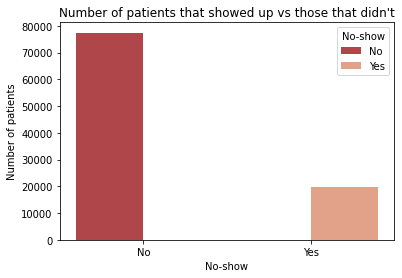

In [ ]:
#set color palette
sns.set_palette('RdBu')
#visualize the nuber if people that showed up vs the number that didn't
sns.countplot(x= 'No-show', data = df_no_show, hue = 'No-show');

#set title and axis label
plt.title("Number of patients that showed up vs those that didn\'t")
plt.ylabel('Number of patients')

>from the graph, it seems more people showed up for the appointment (about 80% which is about 90000+) compared to those that didn't (20% didn't show up which is more 20000+). Our hypothesis has been confirmed.

### Does being Hypertensive affect not showing up or not?

In [ ]:
#function to find proportion  and count of categories across values to the entire population
def find_proportion_or_count(df, column_1, column_2, normalize ):
  '''
  return the count or proportion of categories with respect to the whole population. Takes in four argument:
  df: dataframe of interest
  column_1:column to groupby (string or variable)
  column_2:column to group on(string or variable)
  normalize: True(set the function to calculate proportion), False(default)

  '''
  if normalize == False:
    prop = df.groupby(column_1)[column_2].value_counts()
  else:
    prop = df.groupby(column_1)[column_2].value_counts(normalize = True)
  return prop

In [ ]:
#get count for each of hipertension for No-show
find_proportion_or_count(df_no_show, 'Hipertension', 'No-show', normalize =False )

Hipertension  No-show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

In [ ]:
#find the proportion of patient that are hypertensive to the ones that aren't
find_proportion_or_count(df_no_show, 'Hipertension', 'No-show', normalize = True)

Hipertension  No-show
0             No         0.790963
              Yes        0.209037
1             No         0.826980
              Yes        0.173020
Name: No-show, dtype: float64

> + The population for those without hypertension is four times those with hypertension. 
+ the **show** (No means those that showed up) rate for those without hypertension is 4 times (whcih is about 80% of the population of non hypertensive patients) its **no show** rate
+ the hypertensive patient had a **show** rate of also about 4 times (which is about 83% of the hypertensive total population) its **no show** rate.  

### Count plot to show the count of people for No-show both for the hypertensive and the non-hypertensive

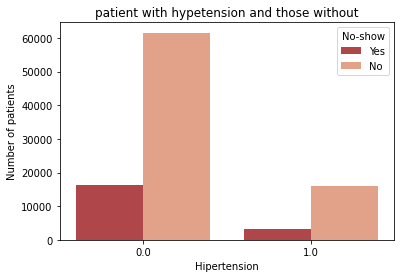

In [ ]:
#setcolor palette
sns.set_palette('RdBu')
#plot using sns countplot
sns.countplot(x='Hipertension', data= df_no_show, hue='No-show', hue_order = ['Yes', 'No']);

#set axis label and title
plt.ylabel('Number of patients')
plt.title('patient with hypetension and those without');

### Do older patient tend not to show up?

In [ ]:
#create age goups
#patient between age 0-40
df_no_show['0-40'] = df_no_show['Age'] <= 40

#age between age 41-65
df_no_show['41-65'] = ((df_no_show['Age'] >= 41) & (df_no_show['Age'] <= 65))

#age 65+
df_no_show['65+'] = df_no_show['Age'] > 65

In [ ]:
#group all the age groups into a list
age_list = list(df_no_show[['0-40', '41-65', '65+']])

In [ ]:
#find the count for each age group
find_proportion_or_count(df_no_show, age_list, 'No-show', normalize = False)

0-40   41-65  65+    No-show
False  False  True   No         11235
                     Yes         2066
       True   False  No         30011
                     Yes         6531
True   False  False  No         46962
                     Yes        13722
Name: No-show, dtype: int64

In [ ]:
# calculate the proportion of Age across the No_show field
find_proportion_or_count(df_no_show, age_list, 'No-show', normalize = True)

0-40   41-65  65+    No-show
False  False  True   No         0.844673
                     Yes        0.155327
       True   False  No         0.821274
                     Yes        0.178726
True   False  False  No         0.773878
                     Yes        0.226122
Name: No-show, dtype: float64

> From the analysis, majority of patients from all age roups tend to show up for appointment. This only shows the numbers, we need to investigate more to see the 

### Box plot between No-show and Age

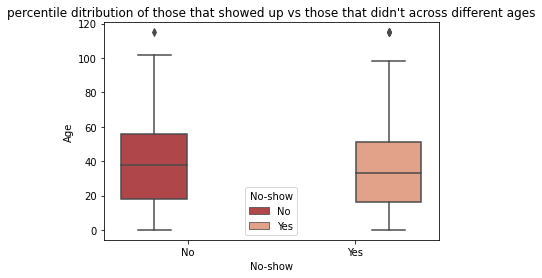

In [ ]:
#plot boxplot of NO SHOW VS AGE
sns.boxplot(data= df_no_show, x = 'No-show', y ='Age' , hue='No-show');

#set title name
plt.title("percentile ditribution of those that showed up vs those that didn\'t across different ages");

> for those that showed for appointment, their median age is around 38 years (50th percentile) i.e 50% of them are below 38 years while the remaining half are above 38 years of age. the plot also showed us that 50% of them are between the ages of around 18 and 56. 25% of the patient are above 56 years and 25% are below 19 years.

> 

### Violin plot between No-show and Age to show the distribution of ages between those that showed vs those that didn't

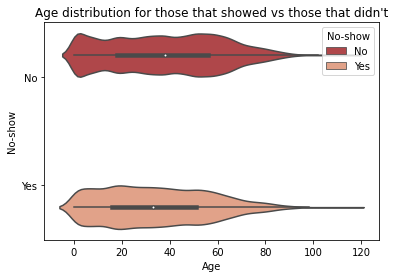

In [ ]:
#plot violin plot between N0 SHOW VS AGE
sns.violinplot(x = 'Age', y = 'No-show', data= df_no_show, hue='No-show');

#set title
plt.title("Age distribution for those that showed vs those that didn\'t");

> The blue thick line represent the interquartile range (i.e the range of age where 50% of the patients lie) 

> its also shows us the probability density function which is represented by the bulginess of the plot

> the part of the plot that bulge out more tell us the  probability that people in that age range will either show or not show where the more bulge signifies higher probability

### DO MORE WOMEN SHOW FOR APPOINTMENT THAN MEN?

In [ ]:

# calculate the distribution of gender across the No_show field
find_proportion_or_count(df_no_show, 'Gender', 'No-show', normalize = False)

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [ ]:

# calculate proportion to the total population of each gender
find_proportion_or_count(df_no_show, 'Gender', 'No-show', normalize = True)

Gender  No-show
F       No         0.796854
        Yes        0.203146
M       No         0.800321
        Yes        0.199679
Name: No-show, dtype: float64

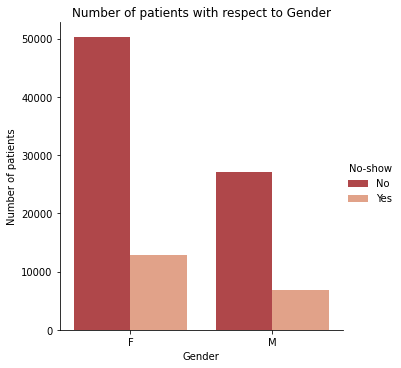

In [ ]:
#plot Gender vs Age with catplot
sns.catplot(x = 'Gender', data = df_no_show, hue = 'No-show', kind = 'count' );

#set the axis name and title
plt.ylabel('Number of patients')
plt.title('Number of patients with respect to Gender');

> There are more scheduled appointment with female gender than with male with 80% of  the showing up and 20% don't. The male gender also sees the same percentage distribution

### Impact of being on health scholarship scheme on showing up for appointments

In [ ]:
#proportion of patient on scholarship vs those without
find_proportion_or_count(df_no_show, 'Scholarship', 'No-show', normalize = True)

Scholarship  No-show
0            No         0.801928
             Yes        0.198072
1            No         0.762637
             Yes        0.237363
Name: No-show, dtype: float64

In [ ]:
find_proportion_or_count(df_no_show, 'Scholarship', 'No-show', normalize = False)

Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

> + From the analysis above, majority of those that scheduled appointment were not on scholarship and about 80% of them showed up for appointment.
+ Only about 10% of patient of patient that schedule appointment were on scholarship. 

<a id='conclusions'></a>
## Conclusions


### Conclusion
> In the first section, relationship between hypertension and No-show was investigated and i found out that hypertension might not be the reason for patients not showing up as a large percentage of them (83%) actually showed up for appointment.

> in the second section, i investigated to see if older patient don't show up for appointment as compared to young patient and it was discovered that older people do show up as well as younger people which led to the conclusion that age might not be a factor for not showing up.

> for the third section, I investigated if women show up for appointment more than men. It was discovered that the proportion of women that showed up and those of men that showed was almost the sam with respective to the total patient for each gender. this means that gender is not a factor for not showing up.

> Looking at those with scholarship and those without, analysis showed that being on scholarship is not a factor for not showing up.



#### Limitations
> in the first section, for the patient who have hypertension and didn't show up, there is no way to tell if hypertension is the cause for not showing up of if there could other reason not stated in the data. 

> in the second section, although the proportion of the old patient that showed is greater compared to thos that didn't, there was no way to investigate further in order to determine if the old patients (65+) that didn't come did so due to their old age
